In [2]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sb 

In [38]:
df5 = pd.read_csv('../../WFc2.vcf', sep = '\t')
df4 = pd.read_table('../Sequence and SNP data/Bout340can.tsv', header = None)
df4['Start'] = df4[[8,9]].min(axis = 1)
df4['End'] = df4[[8,9]].max(axis = 1)
t = []
for s,e in df4[[8,9]].itertuples(index = False):
    if s < e:
        t.append('forward')
    else:
        t.append('reverse')
df4['Strand'] = t

t = []
for c, p in df5[['#CHROM', 'POS']].itertuples(index = False):
    f = False
    for l,o,s,e in df4[df4[1] == c][[0, 'Strand', 'Start', 'End']].itertuples(index = False):
        if s <= p <= e:
            t.append((l, o, s, e))
            f = True
            break
    if f == False:
        t.append(('None', o, s, e))
        
df5['Gene'] = list(zip(*t))[0]
df5['Strand'] = list(zip(*t))[1]
df5['Start'] = list(zip(*t))[2]
df5['End'] = list(zip(*t))[3]

df5 = df5[df5['Gene'] != 'None']

t = []
for i,r in df5.iterrows():
    if ',' in r['ALT']:
        for a in r['ALT'].split(','):
            r2 = r.copy()
            r2.loc['ALT'] = a
            t.append(r2)
    else:
        t.append(r)
        
df6 = pd.DataFrame(t)
df6 = df6.applymap(lambda x: 0 if x == '0/0' else x).applymap(lambda x: str(x).count('/0') if '/0' in str(x) else x).applymap(lambda x: str(x).count('0/') if '0/' in str(x) else x).applymap(lambda x: 2 if '/' in str(x) else x)

In [41]:
df6.drop(columns = ['Gene', 'Strand', 'Start', 'End'])#.to_csv('../../WFC2L.vcf', sep = '\t', index = False)

In [48]:
df3 = pd.read_csv('../Figures and tables/340 substitution effects annotated.csv')

In [66]:
df4 = pd.merge(df, df3[['ID', 'MID', 'ALT']], on = ['ID', 'ALT']).drop_duplicates()

In [68]:
df4['ID'] = df4['MID']

In [70]:
df4.drop(columns = ['MID']).rename(columns = {'ID' : 'MID'}).to_csv('../../WFC2L.vcf', sep = '\t', index = False)

In [11]:
df = pd.read_csv('../../WFC2L.vcf', sep = '\t')

In [5]:
df2 = pd.read_csv('../One-way ANOVA.csv')

In [8]:
df3 = pd.read_csv('../t-test.csv')

In [9]:
df2['FDR adjusted p value'] = multipletests(df2['p value'], alpha=0.01, method='fdr_bh', returnsorted=True)[1]
df3['FDR adjusted p value'] = multipletests(df3['p value'], alpha=0.01, method='fdr_bh', returnsorted=True)[1]

In [10]:
#df2.to_csv('One-way ANOVA for qq.csv', index = False)
#df3.to_csv('t-test for qq.csv', index = False)

In [12]:
df4 = df2[df2['FDR adjusted p value'] < 0.01]

In [13]:
df5 = df3[df3['FDR adjusted p value'] < 0.01]

In [14]:
#df4.to_csv('../Figures and tables/S9 Table One-way ANOVA results.csv', index = False)
#df5.to_csv('../Figures and tables/S10 Table Students t test results.csv', index = False )

In [12]:
df6 = pd.read_excel('../Figures and tables/Table 4 Frameshift and nonsense mutants.xlsx')

In [13]:
df7 = pd.read_csv('../Figures and tables/S12 Table All SNP substitution effects.csv')[['ID', 'Effect', 'MID', 'QTL']]

In [14]:
df7 = df7[df7['Effect'] == 'synonymous']

In [82]:
#df = df.drop(columns = ['#CHROM', 'POS', 'REF', 'MID', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT']).reset_index(drop = True)

In [73]:
tl = df7[df7['QTL'] == ]['MID'].to_list()

In [104]:
q = df6[df6['MID'] == eyed]['QTL'].to_list()[0]

In [111]:
tdf.iloc[:,9:].transpose().corr().mean(axis = 1).describe()

count    1682.000000
mean        0.053072
std         0.090959
min        -0.170935
25%         0.004994
50%         0.066585
75%         0.125486
max         0.170935
dtype: float64

In [126]:
l

[(13955, -17.056434691290217),
 (26887, 4.780739056396002),
 (13576, 4.392805004929336),
 (20747, -1.9996921686647948),
 (15501, 12.720085805526734),
 (15505, 12.72512640767367),
 (16787, -11.59027952197883),
 (16280, 10.225092592601166),
 (16795, -10.731706127928158),
 (14235, 11.72014565510189),
 (24872, -4.02938322154575),
 (10154, 4.3622723237491074),
 (4658, -17.19565310299152),
 (21304, -9.722785525474542),
 (14397, 22.228135942306185),
 (17727, -7.174689937709712),
 (15556, 9.680495376472935),
 (24274, 18.083517764784137),
 (14677, -12.346027551681608),
 (11478, -7.180723068995389),
 (3418, -19.119415794092205),
 (14044, -17.056434691290217),
 (17504, -8.007072037146457),
 (26723, -9.400940962313022),
 (23398, 7.594185698312539),
 (16879, -13.906512153268304),
 (24817, 4.850972666990955),
 (3315, -18.809492630145773),
 (4852, 18.32052419880787),
 (16759, -13.829988890289963),
 (21242, 2.8292609810612697)]

In [122]:
tdf.iloc[:,9:].shape

(2187, 176)

<AxesSubplot:ylabel='Density'>

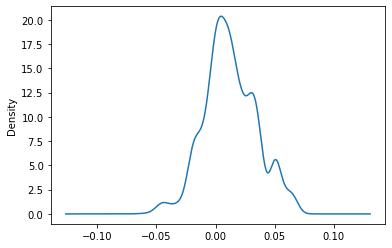

In [178]:
tdf.iloc[:,9:].transpose().corr().mean(axis = 1).plot(kind = 'kde')

In [198]:
x = tdf[(tdf.iloc[:,9:].sum(axis = 1) > 17) & (tdf.iloc[:,9:].sum(axis = 1) < (352 - 17))].iloc[:, 9:].transpose().corr()

In [185]:
stats.shapiro(tdf[(tdf.iloc[:,9:].sum(axis = 1) > 17) & (tdf.iloc[:,9:].sum(axis = 1) < (352 - 17))].iloc[:, 9:].transpose().corr().transform('rank').values.flatten())

c:\users\michael\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9548298716545105, pvalue=0.0)

In [192]:
x = tdf.iloc[:, 9:].transpose().corr().iloc[0,:]

In [201]:
x.iloc[0,:][x.iloc[0,:] > 0.7]

20297    1.000000
20305    0.956433
20316    1.000000
20317    1.000000
20320    0.978762
20338    0.994600
20345    1.000000
20346    1.000000
20347    0.994735
20352    1.000000
20358    1.000000
20361    0.952197
20362    0.933751
20369    1.000000
20370    0.812786
20392    0.812786
20400    1.000000
20402    1.000000
20422    1.000000
20424    0.994600
Name: 20297, dtype: float64

In [219]:
stats.shapiro(tdf[(tdf.iloc[:,9:].sum(axis = 1) > 17) & (tdf.iloc[:,9:].sum(axis = 1) < (352 - 17))].iloc[:, 9:].transpose().corr().transform('rank').values.flatten()).pvalue

3.287965169226914e-12

In [383]:
stats.shapiro(tdf.iloc[:,9:].transpose().corr().fillna(0).values.flatten()[:15])

ShapiroResult(statistic=0.8216108083724976, pvalue=0.00705829169601202)

In [20]:
tdf

,#CHROM,POS,MID,REF,ALT,QUAL,FILTER,INFO,FORMAT,IRIS_313-10340,...,IRIS_313-9397,IRIS_313-9422,IRIS_313-9445,IRIS_313-9594,IRIS_313-9606,IRIS_313-9617,IRIS_313-9626,IRIS_313-9661,IRIS_313-9682,IRIS_313-9696
3310,chr02,8446938,3400,T,C,.,PASS,.,GT,0,...,2,2,0,2,2,2,2,2,0,0
3311,chr02,8446947,3298,G,A,.,PASS,.,GT,0,...,0,0,2,0,0,0,0,0,0,0
3313,chr02,8446951,3299,T,C,.,PASS,.,GT,0,...,0,0,2,0,0,0,0,0,0,0
3314,chr02,8446951,3402,T,C,.,PASS,.,GT,0,...,0,0,2,0,0,0,0,0,0,0
3316,chr02,8446961,3403,C,A,.,PASS,.,GT,0,...,0,0,2,0,0,0,0,0,0,0
3317,chr02,8446962,3301,C,T,.,PASS,.,GT,2,...,2,2,0,2,2,2,2,2,0,2
3319,chr02,8446986,3302,G,A,.,PASS,.,GT,0,...,0,0,2,0,0,0,0,0,0,0
3413,chr02,8448002,3349,C,A,.,PASS,.,GT,0,...,0,0,2,0,0,0,0,0,0,0
3414,chr02,8448002,3452,C,A,.,PASS,.,GT,0,...,0,0,2,0,0,0,0,0,0,0
3416,chr02,8448008,3453,T,A,.,PASS,.,GT,0,...,0,0,2,0,0,0,0,0,0,0


In [15]:
l = []
for eyed in df6['MID'].to_list():
    i = 5
    s = 1
    wid = df6[df6['MID'] == eyed]['ID'].to_list()[0]
    while s > 0.05 :
        tl = df7[(df7['ID'] < (wid + i)) & (df7['ID'] > (wid - i))]['MID'].to_list()
        #tl.append(eyed)
        tdf = df.loc[tl, :]
        
        tdf = tdf[(tdf.iloc[:,9:].sum(axis = 1) > 0) & (tdf.iloc[:,9:].sum(axis = 1) < 352)]
        s = stats.shapiro(tdf.iloc[:,9:].transpose().corr().fillna(0).values.flatten()).pvalue
        i+=1
        
    x = (np.mean(tdf.iloc[:,9:].transpose().corr().mean(axis = 1)) - tdf.iloc[:,9:].transpose().corr().mean(axis = 1)[eyed]) / (np.std(tdf.iloc[:,9:].transpose().corr().mean(axis = 1)))
    p = (stats.norm.sf(abs(x))*2)
    m = np.mean(tdf.iloc[:,9:].transpose().corr().mean(axis = 1))
    sd = np.std(tdf.iloc[:,9:].transpose().corr().mean(axis = 1))
    
    wz, wp = stats.wilcoxon(tdf.iloc[:,9:].transpose().corr().values.flatten() - np.median(tdf.iloc[:,9:].transpose().corr().fillna(0)))

    
    tt = stats.ttest_1samp(tdf.iloc[:,9:].transpose().corr().loc[eyed, :], m)
    
    l.append((eyed, i, m, sd, x, p, tt.statistic, tt.pvalue))

KeyError: 3315

In [343]:
l = []
for eyed in df6['MID'].to_list():
    i = 5
    s = 1
    wid = df6[df6['MID'] == eyed]['ID'].to_list()[0]
    while s > 0.05 :
        tl = df7[(df7['ID'] < (wid + i)) & (df7['ID'] > (wid - i))]['MID'].to_list()
        #tl.append(eyed)
        tdf = df.loc[tl, :]
        
        tdf = tdf[(tdf.iloc[:,9:].sum(axis = 1) > 0) & (tdf.iloc[:,9:].sum(axis = 1) < 352)]
        
        s = stats.shapiro(tdf.iloc[:,9:].transpose().corr().values.flatten()[:int((i**2) / 2)]).pvalue
        i+=1
        
    x = (np.mean(tdf.iloc[:,9:].transpose().corr().mean(axis = 1)) - tdf.iloc[:,9:].transpose().corr().mean(axis = 1)[eyed]) / (np.std(tdf.iloc[:,9:].transpose().corr().mean(axis = 1)))
    p = (stats.norm.sf(abs(x))*2)
    m = np.mean(tdf.iloc[:,9:].transpose().corr().mean(axis = 1))
    sd = np.std(tdf.iloc[:,9:].transpose().corr().mean(axis = 1))
    
    tt = stats.ttest_1samp(tdf.iloc[:,9:].transpose().corr().loc[eyed, :], m)
    
    l.append((eyed, i, m, sd, x, p, tt.statistic, tt.pvalue))

In [25]:
np.square(2)

4

In [40]:
tdf[tdf['MID'] == eyed].index[0]

13963

In [42]:
(tdf.iloc[:,9:].transpose().corr() **2)[tdf[tdf['MID'] == eyed].index[0]].mean()

0.07717645277358703

In [60]:
df.index = df['MID']

In [65]:
#conservation factor whole qtl
l = []
dists = []
for eyed in df6['MID'].to_list():
    q = df6[df6['MID'] == eyed]['QTL'].to_list()[0]
    tl = df7[(df7['QTL'] == q)]['MID'].to_list()
    tl.append(eyed)
    tdf = df.loc[tl, :]
    #tdf = tdf[(tdf.iloc[:,9:].sum(axis = 1) > 0) & (tdf.iloc[:,9:].sum(axis = 1) < 352)]
    x = (tdf.iloc[:,9:].transpose().corr() **2).mean(axis = 1).mean()
    y = (tdf.iloc[:,9:].transpose().corr() **2)[tdf[tdf['MID'] == eyed].index[0]].mean()
    #x = (np.mean(tdf.iloc[:,9:].transpose().corr().mean(axis = 1)) - tdf.iloc[:,9:].transpose().corr().mean(axis = 1)[eyed]) / (np.std(tdf.iloc[:,9:].transpose().corr().mean(axis = 1)))
    #p = stats.norm.sf(abs(x))*2
    
    #wz, wp = stats.wilcoxon(tdf.iloc[:,9:].transpose().corr().values.flatten() - np.median(tdf.iloc[:,9:].transpose().corr().fillna(0)))
    
    l.append((eyed, y, x))

In [66]:
pd.DataFrame(l).to_clipboard()

In [384]:
stats.wilcoxon(tdf.iloc[:,9:].transpose().corr().values.flatten() - np.median(tdf.iloc[:,9:].transpose().corr().fillna(0)))

WilcoxonResult(statistic=4964.0, pvalue=0.6093093982732247)

In [394]:
l = []
for eyed in df6['MID'].to_list():
    wid = df6[df6['MID'] == eyed]['ID'].to_list()[0]
    tl = df7[(df7['ID'] < (wid + 30)) & (df7['ID'] > (wid - 30))]['MID'].to_list()
    #tl.append(eyed)
    tdf = df.loc[tl, :]

    tdf = tdf[(tdf.iloc[:,9:].sum(axis = 1) > 0) & (tdf.iloc[:,9:].sum(axis = 1) < 352)]
        
    x = (np.mean(tdf.iloc[:,9:].transpose().corr().mean(axis = 1)) - tdf.iloc[:,9:].transpose().corr().mean(axis = 1)[eyed]) / (np.std(tdf.iloc[:,9:].transpose().corr().mean(axis = 1)))
    p = (stats.norm.sf(abs(x))*2)
    m = np.mean(tdf.iloc[:,9:].transpose().corr().mean(axis = 1))
    sd = np.std(tdf.iloc[:,9:].transpose().corr().mean(axis = 1))
    
    wz, wp = stats.wilcoxon(tdf.iloc[:,9:].transpose().corr().values.flatten() - np.median(tdf.iloc[:,9:].transpose().corr().values.flatten()))

    
    tt, tp = stats.ttest_1samp(tdf.iloc[:,9:].transpose().corr().loc[eyed, :], m)
    
    l.append((eyed, x, p, tt, tp))

In [389]:
tdf.iloc[:,9:].transpose().corr().values.flatten()

array([1.        , 0.3086161 , 0.3086161 , ..., 0.68604465, 1.        ,
       1.        ])

In [390]:
np.median(tdf.iloc[:,9:].transpose().corr().fillna(0))

0.4325747405876861

In [402]:
tdf.shape

(94, 185)

In [419]:
min(sum((tdf.iloc[:, 9:].transpose().corr() > 0.7).values))

1

In [441]:
#conservation factor whole qtl
l = []
for eyed in df6['MID'].to_list():
    q = df6[df6['MID'] == eyed]['QTL'].to_list()[0]
    tl = df7[(df7['QTL'] == q) & (df7['Effect'] == 'synonymous')]['MID'].to_list()
    tl.append(eyed)
    tdf = df.loc[tl, :]
    tdf = tdf[(tdf.iloc[:,9:].sum(axis = 1) > 0) & (tdf.iloc[:,9:].sum(axis = 1) < 352)]

    a = tdf.iloc[:,9:].transpose().corr().loc[eyed, :].mean()
    b = np.mean(tdf.iloc[:,9:].transpose().corr().mean())
    c = max(tdf.iloc[:,9:].transpose().corr().mean())
    
    l.append((eyed,a,b,c))

In [443]:
pd.DataFrame(l).to_clipboard()

In [ ]:
pd.read_csv('../Figures and tables/S8 Table All SNP substitution effects.csv')[[]]

In [440]:
pd.merge(pd.read_excel('../Figures and tables/Nonsense mutants.xlsx').iloc[:,:-4], 
         pd.read_csv('../Figures and tables/S8 Table All SNP substitution effects.csv')[['MID', 'Frameshift', 'Effect',
                                                                                        'Expression cluster', 'annotation',
                                                                                        'Transcript']],
        on = 'MID', how = 'left').to_clipboard(index = False)

In [456]:
l = []
for i,r in df.iloc[:,9:].iterrows():
    l.append((str(sum((r == 0).values)) + ',' + str(sum((r == 1).values)) + ',' + str(sum((r == 2).values))))

In [457]:
ndf = pd.DataFrame(l)

In [458]:
ndf['MID'] = ndf.index

In [459]:
pd.merge(pd.read_excel('../Figures and tables/Frameshift and nonsense mutants.xlsx'), ndf).to_clipboard()